In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
from Bio.PDB import PDBParser
from Bio.PDB import Superimposer
from Bio import PDB
from Bio.PDB.DSSP import DSSP
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pdbecif.mmcif_io import CifFileReader
from pdbecif.mmcif_tools import MMCIF2Dict
#import metapredict as meta
from pysam import FastaFile
from scipy.stats import mannwhitneyu
import random
from tqdm import tqdm
from scipy.stats import pearsonr
import re
import matplotlib.pyplot as plt
import xgboost as xgb
from Bio import SeqIO
import torch
from sklearn.metrics import precision_recall_curve, auc

import csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import esm
import biotite.structure.io as bsio
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from functools import reduce
import sys
from biopandas.pdb import PandasPdb

import argparse
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
import pathlib
from pyfoldx.structure import Structure
import subprocess
import shutil
from sklearn.preprocessing import LabelEncoder
from Bio.Seq import Seq
from Bio.ExPASy import ScanProsite
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from collections import defaultdict
#from imblearn.over_sampling import SMOTE
import json
import blosum as bl
import nglview
import py3Dmol
from Bio.PDB import PDBParser
from Bio.PDB import PDBIO
from collections import defaultdict
from Bio.PDB.DSSP import DSSP
import warnings 
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
from Bio.PDB import PDBList
import seaborn as sns
#from Bio.SubsMat.MatrixInfo import blosum100
from Bio.PDB.HSExposure import HSExposureCA
from prody import *
torch.cuda.empty_cache()
from pynvml import *
import py3nvml
#import tensorflow as tf

from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import sem
import biographs as bg
from scipy.stats import spearmanr

import sys
#sys.path.append('/hdd/esm/PyRosetta.notebooks/notebooks/')
#from additional_scripts import predict_ddG
from Bio.PDB.DSSP import DSSP

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "garbage_collection_threshold:0.6,max_split_size_mb:412"
import torch
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.utils import resample
from scipy.stats import sem, t
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.utils import resample
from scipy.stats import sem, t
import numpy as np
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler
torch.cuda.empty_cache()
import gc
#del variables
gc.collect()
#!jupyter labextension install jupyterlab_3dmol


13

In [2]:
AF_O43502_foldx = "../../../../RAD51C/foldx/O43502/Foldx_RAD51C_O43502_AF2.tsv"
AF_O43502_ddgun3d = '../../../../RAD51C/DDgun3d/O43502/DDGun_AF2_O43502.tsv'
AF_O43502_rosetta = "../../../../RAD51C/Rosetta/O43502/Rosetta_AF2_O43502_all.tsv"

AF_8FAZ_complex_foldx = '../../../../RAD51C/foldx/AlphaFold/8FAZ/complex/RAD51C_8FAZ_AF2_multimer_all.tsv'
AF_8FAZ_subunit_foldx = '../../../../RAD51C/foldx/AlphaFold/8FAZ/subunit/Foldx_RAD51C_AFsubunit_8FAZ.tsv'
AF_8FAZ_complex_ddgun3d = '../../../../RAD51C/DDgun3d/AlphaFold2/8FAZ/complex/DDGun3D_AF2_8FAZ_complex.tsv'
AF_8FAZ_subunit_ddgun3d = '../../../../RAD51C/DDgun3d/AlphaFold2/8FAZ/subunit/DDGun3D_AF2_8FAZ_subunit.tsv'
AF_8FAZ_complex_rosetta = '../../../../RAD51C/Rosetta/AlphaFold/8FAZ/complex/Rosetta_RAD51C_8FAZ_AF2_complex_all.tsv'
AF_8FAZ_subunit_rosetta = '../../../../RAD51C/Rosetta/AlphaFold/8FAZ/subunit/Rosetta_RAD51C_8FAZ_AF2_subunit_all.tsv'

crystal_complex_foldx = "../../../../RAD51C/foldx/crystal/8FAZ/complex/RAD51C_8FAZ_crystal_foldx.all.tsv"
crystal_subunit_foldx = "../../../../RAD51C/foldx/crystal/8FAZ/subunit/Foldx_RAD51C_crystal_8FAZ.tsv"
crystal_complex_ddgun3d = "../../../../RAD51C/DDgun3d/crystal/8FAZ/DDGun3D_crystal_8FAZ_complex.tsv"
crystal_subunit_ddgun3d = "../../../../RAD51C/DDgun3d/crystal/8FAZ/DDGun3D_crystal_8FAZ_subunit.tsv"
crystal_complex_rosetta = "../RAD51C/Rosetta/crystal/8FAZ/complex/Rosetta_RAD51C_8FAZ_complex_all.tsv"
crystal_subunit_rosetta = '../../../../RAD51C/Rosetta/crystal/8FAZ/subunit/Rosetta_RAD51C_8FAZ_subunit_all.tsv'

#crystal
RAD51C_8GBJ_pdb = "../../../../RAD51C/crystal/8GBJ/8GBJ.pdb"
RAD51C_8OUZ_pdb = '../../../../RAD51C/crystal/8OUZ/8OUZ.pdb'
RAD51C_8GJA_pdb = "../../../../RAD51C/crystal/8GJA/8GJA.pdb"
RAD51C_8OUY_pdb = "../../../../RAD51C/crystal/8OUY/8ouy.pdb"
RAD51C_8FAZ_pdb = "../../../../RAD51C/crystal/8FAZ/8FAZ.pdb"
RAD51C_8FAZ_subunit_pdb = "../../../../RAD51C/crystal/8FAZ/RAD51C_8FAZ_chainC.pdb"
RAD51C_8OUY_subunit_pdb = "../../../../RAD51C/crystal/8OUY/RAD51C_8OUY_chainB.pdb"

#AlphaFold complex
RAD51C_8GJA_AF_pdb = "../../../../RAD51C/AlphaFold/complex/8GJA/8GJA.pdb"
RAD51C_8OUY_AF_pdb1 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUY_2cd93/RAD51C_8OUY_2cd93_unrelaxed_rank_001_alphafold2_multimer_v3_model_4_seed_000.pdb"
RAD51C_8OUY_AF_pdb2 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUY_2cd93/RAD51C_8OUY_2cd93_unrelaxed_rank_002_alphafold2_multimer_v3_model_5_seed_000.pdb"
RAD51C_8OUY_AF_pdb3 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUY_2cd93/RAD51C_8OUY_2cd93_unrelaxed_rank_003_alphafold2_multimer_v3_model_3_seed_000.pdb"
RAD51C_8OUY_AF_pdb4 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUY_2cd93/RAD51C_8OUY_2cd93_unrelaxed_rank_004_alphafold2_multimer_v3_model_1_seed_000.pdb"
RAD51C_8OUY_AF_pdb5 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUY_2cd93/RAD51C_8OUY_2cd93_unrelaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb"

RAD51C_8FAZ_AF_pdb1 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8FAZ_0960b/RAD51C_8FAZ_0960b_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb"
RAD51C_8FAZ_AF_pdb2 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8FAZ_0960b/RAD51C_8FAZ_0960b_unrelaxed_rank_002_alphafold2_multimer_v3_model_5_seed_000.pdb"
RAD51C_8FAZ_AF_pdb3 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8FAZ_0960b/RAD51C_8FAZ_0960b_unrelaxed_rank_003_alphafold2_multimer_v3_model_4_seed_000.pdb"
RAD51C_8FAZ_AF_pdb4 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8FAZ_0960b/RAD51C_8FAZ_0960b_unrelaxed_rank_004_alphafold2_multimer_v3_model_3_seed_000.pdb"
RAD51C_8FAZ_AF_pdb5 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8FAZ_0960b/RAD51C_8FAZ_0960b_unrelaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb"

RAD51C_8OUZ_AF_pdb1 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUZ_94abf/RAD51C_8OUZ_94abf_unrelaxed_rank_001_alphafold2_multimer_v3_model_4_seed_000.pdb"
RAD51C_8OUZ_AF_pdb2 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUZ_94abf/RAD51C_8OUZ_94abf_unrelaxed_rank_002_alphafold2_multimer_v3_model_5_seed_000.pdb"
RAD51C_8OUZ_AF_pdb3 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUZ_94abf/RAD51C_8OUZ_94abf_unrelaxed_rank_003_alphafold2_multimer_v3_model_1_seed_000.pdb"
RAD51C_8OUZ_AF_pdb4 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUZ_94abf/RAD51C_8OUZ_94abf_unrelaxed_rank_004_alphafold2_multimer_v3_model_3_seed_000.pdb"
RAD51C_8OUZ_AF_pdb5 = "../../../../RAD51C/AlphaFold/complex/RAD51C_8OUZ_94abf/RAD51C_8OUZ_94abf_unrelaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb"

RAD51C_8OUY_AF_subunit_pdb1 = "../../../../RAD51C/AlphaFold/subunit/8OUY/RAD51C_8OUY_AF_rank1_subunit_chainB.pdb"
RAD51C_8OUY_AF_subunit_pdb2 = "../../../../RAD51C/AlphaFold/subunit/8OUY/RAD51C_8OUY_AF_rank2_subunit_chainB.pdb"
RAD51C_8OUY_AF_subunit_pdb3 = "../../../../RAD51C/AlphaFold/subunit/8OUY/RAD51C_8OUY_AF_rank3_subunit_chainB.pdb"
RAD51C_8OUY_AF_subunit_pdb4 = "../../../../RAD51C/AlphaFold/subunit/8OUY/RAD51C_8OUY_AF_rank4_subunit_chainB.pdb"
RAD51C_8OUY_AF_subunit_pdb5 = "../../../../RAD51C/AlphaFold/subunit/8OUY/RAD51C_8OUY_AF_rank5_subunit_chainB.pdb"

RAD51C_8FAZ_AF_subunit_pdb1 = "../../../../RAD51C/AlphaFold/subunit/8FAZ/RAD51C_8FAZ_AF_rank1_subunit_chainB.pdb"
RAD51C_8FAZ_AF_subunit_pdb2 = "../../../../RAD51C/AlphaFold/subunit/8FAZ/RAD51C_8FAZ_AF_rank2_subunit_chainB.pdb"
RAD51C_8FAZ_AF_subunit_pdb3 = "../../../../RAD51C/AlphaFold/subunit/8FAZ/RAD51C_8FAZ_AF_rank3_subunit_chainB.pdb"
RAD51C_8FAZ_AF_subunit_pdb4 = "../../../../RAD51C/AlphaFold/subunit/8FAZ/RAD51C_8FAZ_AF_rank4_subunit_chainB.pdb"
RAD51C_8FAZ_AF_subunit_pdb5 = "../../../../RAD51C/AlphaFold/subunit/8FAZ/RAD51C_8FAZ_AF_rank5_subunit_chainB.pdb"

#ESMFOLD
RAD51C_8FAZ_ESM_pdb1 = "../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_esmfold_rep1.pdb"
RAD51C_8FAZ_ESM_pdb2 = "../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_esmfold_rep2.pdb"
RAD51C_8FAZ_ESM_pdb3 = "../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_esmfold_rep3.pdb"
RAD51C_8FAZ_ESM_pdb4 = "../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_esmfold_rep4.pdb"
RAD51C_8FAZ_ESM_pdb5 = "../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_esmfold_rep5.pdb"

RAD51C_8FAZ_ESM_subunit_pdb1 = '../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_ESM_subunit_chainB_pbd1.pdb'
RAD51C_8FAZ_ESM_subunit_pdb2 = '../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_ESM_subunit_chainB_pbd2.pdb'
RAD51C_8FAZ_ESM_subunit_pdb3 = '../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_ESM_subunit_chainB_pbd3.pdb'
RAD51C_8FAZ_ESM_subunit_pdb4 = '../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_ESM_subunit_chainB_pbd4.pdb'
RAD51C_8FAZ_ESM_subunit_pdb5 = '../../../../esmfold_pdb/RAD51C_8FAZ/RAD51C_8FAZ_ESM_subunit_chainB_pbd5.pdb'


RAD51C_8OUY_ESM_pdb1 = "../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_esmfold_rep1.pdb"
RAD51C_8OUY_ESM_pdb2 = "../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_esmfold_rep2.pdb"
RAD51C_8OUY_ESM_pdb3 = "../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_esmfold_rep3.pdb"
RAD51C_8OUY_ESM_pdb4 = "../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_esmfold_rep4.pdb"
RAD51C_8OUY_ESM_pdb5 = "../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_esmfold_rep5.pdb"

RAD51C_8OUZ_ESM_pdb1 = '../../../../esmfold_pdb/RAD51C_8OUZ/8OUZ_esmfold_1.pdb'
RAD51C_8OUZ_ESM_pdb2 = '../../../../esmfold_pdb/RAD51C_8OUZ/8OUZ_esmfold_2.pdb'
RAD51C_8OUZ_ESM_pdb3 = '../../../../esmfold_pdb/RAD51C_8OUZ/8OUZ_esmfold_3.pdb'
RAD51C_8OUZ_ESM_pdb4 = '../../../../esmfold_pdb/RAD51C_8OUZ/8OUZ_esmfold_4.pdb'
RAD51C_8OUZ_ESM_pdb5 = '../../../../esmfold_pdb/RAD51C_8OUZ/8OUZ_esmfold_5.pdb'

RAD51C_8OUY_ESM_subunit_pdb1 = '../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_ESM_subunit_chainB_pbd1.pdb'
RAD51C_8OUY_ESM_subunit_pdb2 = '../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_ESM_subunit_chainB_pbd2.pdb'
RAD51C_8OUY_ESM_subunit_pdb3 = '../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_ESM_subunit_chainB_pbd3.pdb'
RAD51C_8OUY_ESM_subunit_pdb4 = '../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_ESM_subunit_chainB_pbd4.pdb'
RAD51C_8OUY_ESM_subunit_pdb5 = '../../../../esmfold_pdb/RAD51C_8OUY/RAD51C_8OUY_ESM_subunit_chainB_pbd5.pdb'

## BRCA1
# crystal
BRCA1_7LYB_pdb = "../../../../BRCA1/crystal/7LYB/7LYB.pdb"
BRCA1_4OFB_pdb = "../../../../BRCA1/crystal/40FB/4OFB.pdb"
BRCA1_1JM7_pdb = "../../../../BRCA1/crystal/1JM7/1JM7.pdb"
BRCA1_1JNX_pdb = "../../../../BRCA1/crystal/1JNX/1JNX.pdb"
BRCA1_1T15_pdb = '../../../../BRCA1/crystal/1T15/1t15.pdb'
BRCA1_7JZV_pdb = '../../../../BRCA1/crystal/7JZV/7jzv.pdb'

BRCA1_7LYB_subunit_pdb = "../../../../BRCA1/crystal/7LYB/BRCA1_7LYB_crystal_subunit.pdb"
BRCA1_4OFB_subunit_pdb = "../../../../BRCA1/crystal/40FB/BRCA1_4OFB_crystal_subunit.pdb"

#AlphaFold2
BRCA1_1JNX_AF_pdb1 = "../../../../BRCA1/AlphaFold2/1JNX/BRCA1_1JNX_template_6f971/BRCA1_1JNX_template_6f971_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb"
BRCA1_1JNX_AF_pdb2 = "../../../../BRCA1/AlphaFold2/1JNX/BRCA1_1JNX_template_6f971/BRCA1_1JNX_template_6f971_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb"
BRCA1_1JNX_AF_pdb3 = "../../../../BRCA1/AlphaFold2/1JNX/BRCA1_1JNX_template_6f971/BRCA1_1JNX_template_6f971_unrelaxed_rank_003_alphafold2_ptm_model_1_seed_000.pdb"
BRCA1_1JNX_AF_pdb4 = "../../../../BRCA1/AlphaFold2/1JNX/BRCA1_1JNX_template_6f971/BRCA1_1JNX_template_6f971_unrelaxed_rank_004_alphafold2_ptm_model_3_seed_000.pdb"
BRCA1_1JNX_AF_pdb5 = "../../../../BRCA1/AlphaFold2/1JNX/BRCA1_1JNX_template_6f971/BRCA1_1JNX_template_6f971_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb"


BRCA1_1JM7_AF_pdb1 = "../../../../BRCA1/AlphaFold2/1JM7/BRCA1_IJM7_template_2aca5/BRCA1_IJM7_template_2aca5_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb"
BRCA1_1JM7_AF_pdb2 = "../../../../BRCA1/AlphaFold2/1JM7/BRCA1_IJM7_template_2aca5/BRCA1_IJM7_template_2aca5_unrelaxed_rank_002_alphafold2_multimer_v3_model_4_seed_000.pdb"
BRCA1_1JM7_AF_pdb3 = "../../../../BRCA1/AlphaFold2/1JM7/BRCA1_IJM7_template_2aca5/BRCA1_IJM7_template_2aca5_unrelaxed_rank_003_alphafold2_multimer_v3_model_3_seed_000.pdb"
BRCA1_1JM7_AF_pdb4 = "../../../../BRCA1/AlphaFold2/1JM7/BRCA1_IJM7_template_2aca5/BRCA1_IJM7_template_2aca5_unrelaxed_rank_004_alphafold2_multimer_v3_model_5_seed_000.pdb"
BRCA1_1JM7_AF_pdb5 = "../../../../BRCA1/AlphaFold2/1JM7/BRCA1_IJM7_template_2aca5/BRCA1_IJM7_template_2aca5_unrelaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb"

BRCA1_1T15_AF_pdb1 = "../../../../BRCA1/AlphaFold2/1T15_BRCA1_62a2e/1T15_BRCA1_62a2e_unrelaxed_rank_001_alphafold2_multimer_v3_model_4_seed_000.pdb" 
BRCA1_1T15_AF_pdb2 = "../../../../BRCA1/AlphaFold2/1T15_BRCA1_62a2e/1T15_BRCA1_62a2e_unrelaxed_rank_002_alphafold2_multimer_v3_model_2_seed_000.pdb"
BRCA1_1T15_AF_pdb3 = "../../../../BRCA1/AlphaFold2/1T15_BRCA1_62a2e/1T15_BRCA1_62a2e_unrelaxed_rank_003_alphafold2_multimer_v3_model_1_seed_000.pdb"
BRCA1_1T15_AF_pdb4 = "../../../../BRCA1/AlphaFold2/1T15_BRCA1_62a2e/1T15_BRCA1_62a2e_unrelaxed_rank_004_alphafold2_multimer_v3_model_3_seed_000.pdb"
BRCA1_1T15_AF_pdb5 = "../../../../BRCA1/AlphaFold2/1T15_BRCA1_62a2e/1T15_BRCA1_62a2e_unrelaxed_rank_005_alphafold2_multimer_v3_model_5_seed_000.pdb"

BRCA1_4OFB_AF_pdb1 = "../../../../BRCA1/AlphaFold2/4OFB/BRCA1_40FB_template_ac17b/BRCA1_40FB_template_ac17b_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb"
BRCA1_4OFB_AF_pdb2 = "../../../../BRCA1/AlphaFold2/4OFB/BRCA1_40FB_template_ac17b/BRCA1_40FB_template_ac17b_unrelaxed_rank_002_alphafold2_multimer_v3_model_5_seed_000.pdb"
BRCA1_4OFB_AF_pdb3 = "../../../../BRCA1/AlphaFold2/4OFB/BRCA1_40FB_template_ac17b/BRCA1_40FB_template_ac17b_unrelaxed_rank_003_alphafold2_multimer_v3_model_4_seed_000.pdb"
BRCA1_4OFB_AF_pdb4 = "../../../../BRCA1/AlphaFold2/4OFB/BRCA1_40FB_template_ac17b/BRCA1_40FB_template_ac17b_unrelaxed_rank_004_alphafold2_multimer_v3_model_1_seed_000.pdb"
BRCA1_4OFB_AF_pdb5 = "../../../../BRCA1/AlphaFold2/4OFB/BRCA1_40FB_template_ac17b/BRCA1_40FB_template_ac17b_unrelaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb"


BRCA1_7LYB_AF_pdb1 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_template_2618a/BRCA1_7LYB_template_2618a_unrelaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb"
BRCA1_7LYB_AF_pdb2 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_template_2618a/BRCA1_7LYB_template_2618a_unrelaxed_rank_002_alphafold2_multimer_v3_model_1_seed_000.pdb"
BRCA1_7LYB_AF_pdb3 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_template_2618a/BRCA1_7LYB_template_2618a_unrelaxed_rank_003_alphafold2_multimer_v3_model_3_seed_000.pdb"
BRCA1_7LYB_AF_pdb4 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_template_2618a/BRCA1_7LYB_template_2618a_unrelaxed_rank_004_alphafold2_multimer_v3_model_2_seed_000.pdb"
BRCA1_7LYB_AF_pdb5 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_template_2618a/BRCA1_7LYB_template_2618a_unrelaxed_rank_005_alphafold2_multimer_v3_model_4_seed_000.pdb"

BRCA1_7LYB_AF_subunit_pdb1 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_AF2_subunit_chainI_rank1.pdb"
BRCA1_7LYB_AF_subunit_pdb2 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_AF2_subunit_chainI_rank2.pdb"
BRCA1_7LYB_AF_subunit_pdb3 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_AF2_subunit_chainI_rank3.pdb"
BRCA1_7LYB_AF_subunit_pdb4 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_AF2_subunit_chainI_rank4.pdb"
BRCA1_7LYB_AF_subunit_pdb5 = "../../../../BRCA1/AlphaFold2/7LYB/BRCA1_7LYB_AF2_subunit_chainI_rank5.pdb"


BRCA1_7JZV_AF_pdb1 = '../../../../BRCA1/AlphaFold2/7JZV_f0e9d/7JZV_f0e9d_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb'
BRCA1_7JZV_AF_pdb2 = '../../../../BRCA1/AlphaFold2/7JZV_f0e9d/7JZV_f0e9d_unrelaxed_rank_002_alphafold2_multimer_v3_model_5_seed_000.pdb'
BRCA1_7JZV_AF_pdb3 = '../../../../BRCA1/AlphaFold2/7JZV_f0e9d/7JZV_f0e9d_unrelaxed_rank_003_alphafold2_multimer_v3_model_4_seed_000.pdb'
BRCA1_7JZV_AF_pdb4 = '../../../../BRCA1/AlphaFold2/7JZV_f0e9d/7JZV_f0e9d_unrelaxed_rank_004_alphafold2_multimer_v3_model_1_seed_000.pdb'
BRCA1_7JZV_AF_pdb5 = '../../../../BRCA1/AlphaFold2/7JZV_f0e9d/7JZV_f0e9d_unrelaxed_rank_005_alphafold2_multimer_v3_model_2_seed_000.pdb'



#ESMFOLD
BRCA1_1JNX_ESM_pdb1 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep1.pdb.pdb"
BRCA1_1JNX_ESM_pdb2 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep2.pdb.pdb"
BRCA1_1JNX_ESM_pdb3 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep3.pdb.pdb"
BRCA1_1JNX_ESM_pdb4 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep4.pdb.pdb"
BRCA1_1JNX_ESM_pdb5 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep5.pdb.pdb"

BRCA1_1JM7_ESM_pdb1 = "../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_esmfold_rep1.pdb.pdb"
BRCA1_1JM7_ESM_pdb2 = "../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_esmfold_rep2.pdb.pdb"
BRCA1_1JM7_ESM_pdb3 = "../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_esmfold_rep3.pdb.pdb"
BRCA1_1JM7_ESM_pdb4 = "../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_esmfold_rep4.pdb.pdb"
BRCA1_1JM7_ESM_pdb5 = "../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_esmfold_rep5.pdb.pdb"

BRCA1_4OFB_ESM_pdb1 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_esmfold_rep1.pdb.pdb"
BRCA1_4OFB_ESM_pdb2 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_esmfold_rep2.pdb.pdb"
BRCA1_4OFB_ESM_pdb3 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_esmfold_rep3.pdb.pdb"
BRCA1_4OFB_ESM_pdb4 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_esmfold_rep4.pdb.pdb"
BRCA1_4OFB_ESM_pdb5 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_esmfold_rep5.pdb.pdb"

BRCA1_1T15_ESM_pdb1 = '../../../../esmfold_pdb/BRCA1_1T15/BRCA1_1T15_1.pdb'
BRCA1_1T15_ESM_pdb2 = '../../../../esmfold_pdb/BRCA1_1T15/BRCA1_1T15_2.pdb'
BRCA1_1T15_ESM_pdb3 = '../../../../esmfold_pdb/BRCA1_1T15/BRCA1_1T15_3.pdb'
BRCA1_1T15_ESM_pdb4 = '../../../../esmfold_pdb/BRCA1_1T15/BRCA1_1T15_4.pdb'
BRCA1_1T15_ESM_pdb5 = '../../../../esmfold_pdb/BRCA1_1T15/BRCA1_1T15_5.pdb'

BRCA1_1JNX_ESM_subunit_pdb1 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep1.pdb.pdb"
BRCA1_1JNX_ESM_subunit_pdb2 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep2.pdb.pdb"
BRCA1_1JNX_ESM_subunit_pdb3 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep3.pdb.pdb"
BRCA1_1JNX_ESM_subunit_pdb4 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep4.pdb.pdb"
BRCA1_1JNX_ESM_subunit_pdb5 = "../../../../esmfold_pdb/BRCA1_1JNX/BRCA1_1JNX_esmfold_rep5.pdb.pdb"

BRCA1_1JM7_ESM_subunit_pdb1 = '../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_ESM_subunit_chainA_pdb1.pdb'
BRCA1_1JM7_ESM_subunit_pdb2 = '../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_ESM_subunit_chainA_pdb2.pdb'
BRCA1_1JM7_ESM_subunit_pdb3 = '../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_ESM_subunit_chainA_pdb3.pdb'
BRCA1_1JM7_ESM_subunit_pdb4 = '../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_ESM_subunit_chainA_pdb4.pdb'
BRCA1_1JM7_ESM_subunit_pdb5 = '../../../../esmfold_pdb/BRCA1_1JM7/BRCA1_1JM7_ESM_subunit_chainA_pdb5.pdb'

BRCA1_4OFB_ESM_subunit_pdb1 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_ESM_subunit_chainA_pdb1.pdb"
BRCA1_4OFB_ESM_subunit_pdb2 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_ESM_subunit_chainA_pdb2.pdb"
BRCA1_4OFB_ESM_subunit_pdb3 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_ESM_subunit_chainA_pdb3.pdb"
BRCA1_4OFB_ESM_subunit_pdb4 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_ESM_subunit_chainA_pdb4.pdb"
BRCA1_4OFB_ESM_subunit_pdb5 = "../../../../esmfold_pdb/BRCA1_4OFB/BRCA1_4OFB_ESM_subunit_chainA_pdb5.pdb"


##PALB2
#crystal
PALB2_3EU7_pdb = "../../../../PALB2/crystal/3EU7/3EU7.pdb"
PALB2_3EU7_sub_pdb = "../../../../PALB2/crystal/3EU7/PALB2_3EU7_crystal_chainA.pdb"
PALB2_2W18_pdb = '../../../../PALB2/crystal/2W18/2W18.pdb'
PALB2_2W18_subunit_pdb = '../../../../PALB2/crystal/2W18/2W18.pdb'
BRCA1_1JM7_subunit_pdb = '../../../../BRCA1/crystal/1JM7/BRCA1_1JM7_crystal_subunit.pdb'
PALB2_3EU7_subunit_pdb = '../../../../PALB2/crystal/3EU7/PALB2_3EU7_crystal_chainA.pdb'

#Alphafold2
PALB2_3EU7_AF2_pdb1 = "../../../../PALB2/AlphaFold2/3EU7/PALB2_3EU7_template_854c8/PALB2_3EU7_template_854c8_unrelaxed_rank_001_alphafold2_multimer_v3_model_2_seed_000.pdb"
PALB2_3EU7_AF2_pdb2 = "../../../../PALB2/AlphaFold2/3EU7/PALB2_3EU7_template_854c8/PALB2_3EU7_template_854c8_unrelaxed_rank_002_alphafold2_multimer_v3_model_1_seed_000.pdb"
PALB2_3EU7_AF2_pdb3 = "../../../../PALB2/AlphaFold2/3EU7/PALB2_3EU7_template_854c8/PALB2_3EU7_template_854c8_unrelaxed_rank_003_alphafold2_multimer_v3_model_3_seed_000.pdb"
PALB2_3EU7_AF2_pdb4 = "../../../../PALB2/AlphaFold2/3EU7/PALB2_3EU7_template_854c8/PALB2_3EU7_template_854c8_unrelaxed_rank_004_alphafold2_multimer_v3_model_4_seed_000.pdb"
PALB2_3EU7_AF2_pdb5 = "../../../../PALB2/AlphaFold2/3EU7/PALB2_3EU7_template_854c8/PALB2_3EU7_template_854c8_unrelaxed_rank_005_alphafold2_multimer_v3_model_5_seed_000.pdb"

PALB2_2W18_AF2_pdb1 = "../../../../PALB2/AlphaFold2/2W18/PALB2_2W18_template_93232/PALB2_2W18_template_93232_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb"
PALB2_2W18_AF2_pdb2 = "../../../../PALB2/AlphaFold2/2W18/PALB2_2W18_template_93232/PALB2_2W18_template_93232_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb"
PALB2_2W18_AF2_pdb3 = "../../../../PALB2/AlphaFold2/2W18/PALB2_2W18_template_93232/PALB2_2W18_template_93232_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb"
PALB2_2W18_AF2_pdb4 = "../../../../PALB2/AlphaFold2/2W18/PALB2_2W18_template_93232/PALB2_2W18_template_93232_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb"
PALB2_2W18_AF2_pdb5 = "../../../../PALB2/AlphaFold2/2W18/PALB2_2W18_template_93232/PALB2_2W18_template_93232_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb"

#ESMFOLD
PALB2_3EU7_ESM_pdb1 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep1.pdb"
PALB2_3EU7_ESM_pdb2 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep2.pdb"
PALB2_3EU7_ESM_pdb3 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep3.pdb"
PALB2_3EU7_ESM_pdb4 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep4.pdb"
PALB2_3EU7_ESM_pdb5 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep5.pdb"

PALB2_2W18_ESM_pdb1 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep1.pdb"
PALB2_2W18_ESM_pdb2 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep2.pdb"
PALB2_2W18_ESM_pdb3 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep3.pdb"
PALB2_2W18_ESM_pdb4 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep4.pdb"
PALB2_2W18_ESM_pdb5 = "../../../../esmfold_pdb/PALB2_2W18/PALB2_2W18_esmfold_rep5.pdb"

##BRCA2
BRCA2_1IYJ_pdb = "../../../../BRCA2/crystal/1IYJ/1IYJ_fixed.pdb"
BRCA2_1IYJ_subunit_pdb = "../../../../BRCA2/crystal/1IYJ/BRCA2_1IYJ_crystal_subunit_chainB.pdb"
BRCA2_1MJE_pdb = "../../../../BRCA2/crystal/1MJE/1MJE_fixed_copy.pdb"
BRCA2_1MJE_subunit_pdb = "../../../../BRCA2/crystal/1MJE/BRCA2_1MJE_crystal_subunit.pdb"
BRCA2_1MIU_pdb = "../../../../BRCA2/crystal/1MIU/1MIU.pdb"

#Alphafold2
BRCA2_1IYJ_AF2_pdb1 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_template_ccaf3/BRCA2_1IYJ_template_ccaf3_unrelaxed_rank_001_alphafold2_multimer_v3_model_3_seed_000.pdb'
BRCA2_1IYJ_AF2_pdb2 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_template_ccaf3/BRCA2_1IYJ_template_ccaf3_unrelaxed_rank_002_alphafold2_multimer_v3_model_2_seed_000.pdb'
BRCA2_1IYJ_AF2_pdb3 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_template_ccaf3/BRCA2_1IYJ_template_ccaf3_unrelaxed_rank_003_alphafold2_multimer_v3_model_5_seed_000.pdb'
BRCA2_1IYJ_AF2_pdb4 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_template_ccaf3/BRCA2_1IYJ_template_ccaf3_unrelaxed_rank_004_alphafold2_multimer_v3_model_4_seed_000.pdb'
BRCA2_1IYJ_AF2_pdb5 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_template_ccaf3/BRCA2_1IYJ_template_ccaf3_unrelaxed_rank_005_alphafold2_multimer_v3_model_1_seed_000.pdb'


BRCA2_1IYJ_AF2_subunit_pdb1 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_AF2_subunit_chainC_rank1.pdb'
BRCA2_1IYJ_AF2_subunit_pdb2 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_AF2_subunit_chainC_rank2.pdb'
BRCA2_1IYJ_AF2_subunit_pdb3 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_AF2_subunit_chainC_rank3.pdb'
BRCA2_1IYJ_AF2_subunit_pdb4 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_AF2_subunit_chainC_rank4.pdb'
BRCA2_1IYJ_AF2_subunit_pdb5 = '../../../../BRCA2/AlphaFold2/1IYJ/BRCA2_1IYJ_AF2_subunit_chainC_rank5.pdb'

BRCA2_1MJE_AF2_pdb1 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_template_666dc/BRCA2_1MJE_template_666dc_unrelaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb'
BRCA2_1MJE_AF2_pdb2 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_template_666dc/BRCA2_1MJE_template_666dc_unrelaxed_rank_002_alphafold2_multimer_v3_model_4_seed_000.pdb'
BRCA2_1MJE_AF2_pdb3 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_template_666dc/BRCA2_1MJE_template_666dc_unrelaxed_rank_003_alphafold2_multimer_v3_model_2_seed_000.pdb'
BRCA2_1MJE_AF2_pdb4 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_template_666dc/BRCA2_1MJE_template_666dc_unrelaxed_rank_004_alphafold2_multimer_v3_model_1_seed_000.pdb'
BRCA2_1MJE_AF2_pdb5 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_template_666dc/BRCA2_1MJE_template_666dc_unrelaxed_rank_005_alphafold2_multimer_v3_model_3_seed_000.pdb'

BRCA2_1MIU_AF2_pdb1 = '../../../../BRCA2/AlphaFold2/1MIU/1MIU_c76de/1MIU_c76de_unrelaxed_rank_001_alphafold2_multimer_v3_model_5_seed_000.pdb'
BRCA2_1MIU_AF2_pdb2 = '../../../../BRCA2/AlphaFold2/1MIU/1MIU_c76de/1MIU_c76de_unrelaxed_rank_002_alphafold2_multimer_v3_model_3_seed_000.pdb'
BRCA2_1MIU_AF2_pdb3 = '../../../../BRCA2/AlphaFold2/1MIU/1MIU_c76de/1MIU_c76de_unrelaxed_rank_003_alphafold2_multimer_v3_model_2_seed_000.pdb'
BRCA2_1MIU_AF2_pdb4 = '../../../../BRCA2/AlphaFold2/1MIU/1MIU_c76de/1MIU_c76de_unrelaxed_rank_004_alphafold2_multimer_v3_model_4_seed_000.pdb'
BRCA2_1MIU_AF2_pdb5 = '../../../../BRCA2/AlphaFold2/1MIU/1MIU_c76de/1MIU_c76de_unrelaxed_rank_005_alphafold2_multimer_v3_model_1_seed_000.pdb'

BRCA2_1MJE_AF2_subunit_pdb1 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_AF2_subunit_rank1.pdb'
BRCA2_1MJE_AF2_subunit_pdb2 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_AF2_subunit_rank2.pdb'
BRCA2_1MJE_AF2_subunit_pdb3 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_AF2_subunit_rank3.pdb'
BRCA2_1MJE_AF2_subunit_pdb4 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_AF2_subunit_rank4.pdb'
BRCA2_1MJE_AF2_subunit_pdb5 = '../../../../BRCA2/AlphaFold2/1MJE/BRCA2_1MJE_AF2_subunit_rank5.pdb'

#esmfold
BRCA2_1IYJ_ESM_pdb1 = "../../../../esmfold_pdb/BRCA2_1IYJ/BRCA2_1IYJ_esmfold_af40e/ptm0.575_r3_default.pdb"
BRCA2_1IYJ_ESM_subunit_pdb1 = "../../../../esmfold_pdb/BRCA2_1IYJ/BRCA2_1IYJ_ESM_chainA_subunit_pdb1.pdb"

BRCA2_1MJE_ESM_pdb1 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_esmfold_666dc/ptm0.640_r3_default.pdb"
BRCA2_1MJE_ESM_pdb2 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_esmfold2_666dc/ptm0.640_r3_default.pdb"
BRCA2_1MJE_ESM_pdb3 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_esmfold3_666dc/ptm0.640_r3_default.pdb"
BRCA2_1MJE_ESM_pdb4 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_esmfold4_666dc/ptm0.640_r3_default.pdb"
BRCA2_1MJE_ESM_pdb5 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_esmfold5_666dc/ptm0.640_r3_default.pdb"

BRCA2_1MIU_ESM_pdb1 = "../../../../esmfold_pdb/BRCA2_1MIU/1MIU_esmfold_1.pdb" 
BRCA2_1MIU_ESM_pdb2 = "../../../../esmfold_pdb/BRCA2_1MIU/1MIU_esmfold_2.pdb"
BRCA2_1MIU_ESM_pdb3 = "../../../../esmfold_pdb/BRCA2_1MIU/1MIU_esmfold_3.pdb"
BRCA2_1MIU_ESM_pdb4 = "../../../../esmfold_pdb/BRCA2_1MIU/1MIU_esmfold_4.pdb"
BRCA2_1MIU_ESM_pdb5 = "../../../../esmfold_pdb/BRCA2_1MIU/1MIU_esmfold_5.pdb"

BRCA2_1MJE_ESM_subunit_pdb1 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_ESM_chainA_subunit_pdb1.pdb"
BRCA2_1MJE_ESM_subunit_pdb2 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_ESM_chainA_subunit_pdb2.pdb"
BRCA2_1MJE_ESM_subunit_pdb3 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_ESM_chainA_subunit_pdb3.pdb"
BRCA2_1MJE_ESM_subunit_pdb4 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_ESM_chainA_subunit_pdb4.pdb"
BRCA2_1MJE_ESM_subunit_pdb5 = "../../../../esmfold_pdb/BRCA2_1MJE/BRCA2_1MJE_ESM_chainA_subunit_pdb5.pdb"

In [3]:
from Bio import SeqIO

class FastaComplex:

    def __init__(self, ref1, ref2, ref1_tup, ref2_tup,
                 ref1_aa=None,
                 ref1_mut_pos=None,
                 ref1_mut_aa=None,
                 ref2_aa=None,
                 ref2_mut_pos=None, 
                 ref2_mut_aa=None):
        self.ref1 = ref1
        self.ref2 = ref2
        self.ref1_tup = ref1_tup
        self.ref2_tup = ref2_tup
        self.ref1_aa = ref1_aa
        self.ref1_mut_pos = ref1_mut_pos
        self.ref1_mut_aa = ref1_mut_aa
        self.ref2_aa = ref2_aa
        self.ref2_mut_pos = ref2_mut_pos
        self.ref2_mut_aa = ref2_mut_aa

    def __iter__(self):
        return self

    def generate_seq_ref(self, ref_file, ref_tup, ref_aa, ref_mut_pos, ref_mut_aa):
        for record in SeqIO.parse(ref_file, "fasta"):
            sequence = str(record.seq)
            start_position = ref_tup[0]
            end_position = ref_tup[1]

            if ref_mut_aa and ref_mut_pos is not None:
                new_end = ref_mut_pos - 1
                start_seq = sequence[start_position:new_end] + ref_mut_aa
                assert sequence[new_end] == ref_aa
                #print(sequence[new_end])
                new_pos = new_end - start_position  + 1
                variant = ref_aa + str(new_pos) + ref_mut_aa
                new_start = ref_mut_pos 
                end_seq = sequence[new_start:end_position +1]
                req_seq = start_seq + end_seq
                return req_seq, variant
            else:
                extracted_sequence = sequence[start_position:end_position + 1]
                return extracted_sequence, None

    def generate_seq_ref1(self):
        out = self.generate_seq_ref(self.ref1, self.ref1_tup, self.ref1_aa, self.ref1_mut_pos, self.ref1_mut_aa)
        return out
        
    def generate_seq_ref2(self):
        out = self.generate_seq_ref(self.ref2, self.ref2_tup, self.ref2_aa, self.ref2_mut_pos, self.ref2_mut_aa)
        return out
    
    def combine_seq(self):
        seq1, var1 = self.generate_seq_ref1()
        seq2, var2  = self.generate_seq_ref2()
        out_seq = seq1 + ":" + seq2
        if var1:
            return out_seq, var1
        else:
            return out_seq, var2
        
def view_protein(pdb_data):
    structure1 = parsePDB(pdb_data)
    view = view3D(structure1, width=600, height=700)
    colors = {154:'red', 155:'red', 156:'red', 157:'red'}

    view.setStyle({'chain':'A'}, {'sphere': {'color':'purple'}})
    view.setStyle({'chain':'B'}, {'sphere': {'color':'orange'}})
    view.setStyle({'chain':'C'}, {'sphere': {'color':'blue'}})
    #view.setStyle({'chain': 'C','resi':154},{'sphere': {'color':'red'}})
    view.setStyle({'chain':'D'}, {'sphere': {'color':'green'}})
    view.setStyle({'chain':'E'}, {'sphere': {'color':'gray'}})
    view.setStyle({'chain':'X'}, {'sphere': {'color':'yellow'}})
    view.setStyle({'chain':'H'}, {'sphere': {'color':'brown'}})

    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightblue'}, {'chain':'C'})
    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightorange'}, {'chain':'B'})
    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightgreen'}, {'chain':'D'})
    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightyellow'}, {'chain':'X'})
    view.Style({'chain':'C'},{'stick':{'color':{'prop':'resi','map':colors}}})
    view.zoomTo()
    return view
        
def rmsd_pdb(pdb1, pdb2, chain_A, chain_B):
    structure1 = parsePDB(pdb1)
    structure2 = parsePDB(pdb2)
    showProtein(structure1, structure2);
    results = matchChains(structure1[chain_A], structure2[chain_B])
    apo_chA, bnd_chA, seqid, overlap = results[0]
    rmsd =calcRMSD(bnd_chA, apo_chA)
    return rmsd

    
def superimpose_pdb(pdb1, pdb2,chain_A, chain_B):
    structure1 = parsePDB(pdb1)
    structure2 = parsePDB(pdb2)
    #results = matchChains(pdb1, pdb2)
    results = matchChains(structure1[chain_A], structure2[chain_B])
    apo_chA, bnd_chA, seqid, overlap = results[0]
    bnd_chA, transformation = superpose(bnd_chA, apo_chA)
    view = view3D(structure1, structure2, width=600, height=700)
    view.setStyle({'model': -1},{'cartoon':{'colorscheme':'magentaCarbon'}})
    view.setStyle({'model': -2},{'cartoon':{'colorscheme':'blue'}})
    return view

def get_fasta_from_pdb(pdb_file, chain_id):
    seq_list = []
    with open(pdb_file, "r") as pdb_handle:
        structures = SeqIO.parse(pdb_handle, "pdb-atom")
        for structure in structures:
            print('>' + structure.id)
            print(structure.seq)
            seq_list.append(structure.seq)
    print(":".join(str(i) for i in seq_list))

def get_amino_acid_positions(pdb, pdb_file, chain_id):
    positions = []
    structure = PDBParser().get_structure(pdb , pdb_file)
    model = structure[0]
    chain = model[chain_id]
    for residue in chain:
        residue_id = residue.get_id()[1]
        positions.append(residue_id)
    return positions


def extract_chain(input_pdb, output_pdb, target_chain):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('input_structure', input_pdb)
    io = PDB.PDBIO()
    for model in structure:
        for chain in model:
            if chain.id == target_chain:
                target_structure = PDB.Structure.Structure('output_structure')
                target_model = PDB.Model.Model(0)
                target_structure.add(target_model)
                target_model.add(chain.copy())
                io.set_structure(target_structure)
                io.save(output_pdb)
                print(f"Chain '{target_chain}' extracted and saved to {output_pdb}")
                return
    print(f"Chain '{target_chain}' not found in the input PDB file.")   

def view_protein(pdb_data):
    structure1 = parsePDB(pdb_data)
    view = view3D(structure1, width=600, height=700)
    colors = {154:'red', 155:'red', 156:'red', 157:'red'}
    view.setStyle({'chain':'A'}, {'sphere': {'color':'purple'}})
    view.setStyle({'chain':'B'}, {'sphere': {'color':'orange'}})
    view.setStyle({'chain':'C'}, {'sphere': {'color':'blue'}})
    #view.setStyle({'chain': 'C','resi':154},{'sphere': {'color':'red'}})
    view.setStyle({'chain':'D'}, {'sphere': {'color':'green'}})
    view.setStyle({'chain':'E'}, {'sphere': {'color':'gray'}})
    view.setStyle({'chain':'X'}, {'sphere': {'color':'yellow'}})
    view.setStyle({'chain':'H'}, {'sphere': {'color':'brown'}})

    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightblue'}, {'chain':'C'})
    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightorange'}, {'chain':'B'})
    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightgreen'}, {'chain':'D'})
    view.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightyellow'}, {'chain':'X'})
    view.setStyle({'chain':'C', 'resi':str(1)},{'sphere':{'color':'red'}})
    view.setStyle({'chain':'C', 'resi':str(2)},{'sphere':{'color':'red'}})
    view.setStyle({'chain':'C', 'resi':3},{'sphere':{'color':'red'}})
    #view.addLabel("H41",{'chain':'C', 'fontOpacity':1},{'resi':'41'})
    #view.addStyle({'chain':'C','resi':'41'},{'sphere': {'color': 'red'}})
    #view.addStyle({'chain':'C','resi':'212'},{'sphere': {'color': 'red'}})
    #view.zoomTo()
    return view

def rmsd_superimposer_pdb(structure1_path, structure2_path, chain_A, chain_B,offset=0):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    chain1 = structure1[0][chain_A]
    chain2 = structure2[0][chain_B]
    atoms1 = list(chain1.get_atoms())
    atoms2 = list(chain2.get_atoms())
    matched_atoms1 = []
    matched_atoms2 = []
    for atom1 in atoms1:
        for atom2 in atoms2:
            if atom1.name == atom2.name and atom1.full_id[3][1] == atom2.full_id[3][1] + offset:
                matched_atoms1.append(atom1)
                matched_atoms2.append(atom2)
                break

    print(f'Number of matched atoms in Chain {chain_A} of Structure 1: {len(matched_atoms1)}')
    print(f'Number of matched atoms in Chain {chain_B} of Structure 2: {len(matched_atoms2)}')
    superimposer = Superimposer()

    try:
        superimposer.set_atoms(matched_atoms1, matched_atoms2)
    except Exception as e:
        print(f'Error during set_atoms: {e}')

    rmsd = superimposer.rms
    return rmsd


def three_to_one(aa_three):
    amino_acids = {
        'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D',
        'CYS': 'C', 'GLU': 'E', 'GLN': 'Q', 'GLY': 'G',
        'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K',
        'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S',
        'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
    }

    return amino_acids.get(aa_three.upper(), None)

def calculate_AA_distance(structure1_path, structure2_path, chain):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    structure_dict = defaultdict(list)
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2):
            for residue1, residue2 in zip(chain1, chain2):
                key = residue1.resname + "_" + str(residue1.id[1]) + "_" + str(chain1.id) +"_"+ residue2.resname + "_" + str(residue2.id[1]) + "_" +str(chain2.id)
                for atom1, atom2 in zip(residue1, residue2):
                    atoms1.append(atom1)
                    atoms2.append(atom2)
                    tup_atom = (atom1, atom2)
                    structure_dict[key].append(tup_atom)
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    superimposer.apply(structure2.get_atoms())  
    aa_distance_dict = {}
    for k, v in structure_dict.items():
        distances = [np.linalg.norm(atom[0].coord - atom[1].coord) for atom in v]
        mean_distance = np.mean(distances)
        aa_distance_dict[k] = mean_distance
    df = pd.DataFrame.from_dict(aa_distance_dict, orient='index', columns=['Mean_Distance'])
    #print(df)
    df = df.reset_index()
    df[['crystal_residue', 'crystal_pos', 'crystal_chain', 'AF2_residue', 'AF2_position', "AF2_chain"]] = df['index'].str.split('_', expand=True)
    df['crystal_residue'] =  df['crystal_residue'].apply(lambda x: three_to_one(x))
    df['AF2_residue'] =  df['AF2_residue'].apply(lambda x: three_to_one(x))
    df = df[df['crystal_chain'] == chain]
    #df['group'] = group
    df['REF_POS'] = df['crystal_residue'] + df['crystal_pos'].astype('str')
    df = df[['REF_POS', 'Mean_Distance']]
    return df

def calculate_AA_ca_distance(structure1_path, structure2_path, chain):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    structure_dict = defaultdict(list)
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2):
            for residue1, residue2 in zip(chain1, chain2):
                key = residue1.resname + "_" + str(residue1.id[1]) + "_" + str(chain1.id) +"_"+ residue2.resname + "_" + str(residue2.id[1]) + "_" +str(chain2.id)
                for atom1, atom2 in zip(residue1, residue2):
                    if atom1.name == 'CA' and atom2.name == 'CA':
                        atoms1.append(atom1)
                        atoms2.append(atom2)
                        tup_atom = (atom1, atom2)
                        structure_dict[key].append(tup_atom)
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    superimposer.apply(structure2.get_atoms())  # Apply the transformation to structure2

    aa_distance_dict = {}
    for k, v in structure_dict.items():
        distances = [np.linalg.norm(atom[0].coord - atom[1].coord) for atom in v]
        mean_distance = np.mean(distances)
        aa_distance_dict[k] = mean_distance
    df = pd.DataFrame.from_dict(aa_distance_dict, orient='index', columns=['Mean_Distance'])
    df = df.reset_index()
    df[['crystal_residue', 'crystal_pos', 'crystal_chain', 'AF2_residue', 'AF2_position', "AF2_chain"]] = df['index'].str.split('_', expand=True)
    df['crystal_residue'] =  df['crystal_residue'].apply(lambda x: three_to_one(x))
    df['AF2_residue'] =  df['AF2_residue'].apply(lambda x: three_to_one(x))
    df = df[df['crystal_chain'] == chain]
    df['REF_POS'] = df['crystal_residue'] + df['crystal_pos'].astype('str')
    df = df[['REF_POS', 'Mean_Distance']]
    return df


def calculate_whole_rmsd(structure1_path, structure2_path):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2):
            for residue1, residue2 in zip(chain1, chain2):
                for atom1, atom2 in zip(residue1, residue2):
                    atoms1.append(atom1)
                    atoms2.append(atom2)
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    rmsd = superimposer.rms
    return rmsd

#def calculate_whole_rmsd_chain(structure1_path, structure2_path, chain_structure1, chain_structure2):
    # Parse the PDB files
#    parser = PDBParser(QUIET=True)
#    structure1 = parser.get_structure('structure1', structure1_path)
#    structure2 = parser.get_structure('structure2', structure2_path)
#    atoms1 = []
#    atoms2 = []
#    for model1, model2 in zip(structure1, structure2):
        #print(model1, model2)
#        for chain1, chain2 in zip(model1, model2):
#            print(chain1.id, chain2.id)
#            print(chain_structure1, chain_structure2)
#            if chain1.id == chain_structure1 and chain2.id == chain_structure2:
#                print(chain1.id, chain2.id)
#                for residue1, residue2 in zip(chain1, chain2):
#                    for atom1, atom2 in zip(residue1, residue2):
#                        atoms1.append(atom1)
#                        atoms2.append(atom2)
#    superimposer = Superimposer()
#    superimposer.set_atoms(atoms1, atoms2)
#    rmsd = superimposer.rms
#    return rmsd

def calculate_whole_rmsd_chain(structure1_path, structure2_path, chain_structure1, chain_structure2):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)  
    atoms1 = []
    atoms2 = []
    for model1, model2 in zip(structure1, structure2):
        chain1 = None
        chain2 = None
        for chain in model1:
            if chain.id == chain_structure1:
                chain1 = chain
                break
                
        for chain in model2:
            if chain.id == chain_structure2:
                chain2 = chain
                break
        if chain1 is None or chain2 is None:
            print("not found in the structures")
        for residue1, residue2 in zip(chain1, chain2):
            #if residue1.id == residue2.id:
            for atom1, atom2 in zip(residue1, residue2):
                atoms1.append(atom1)
                atoms2.append(atom2)

    if len(atoms1) == 0 or len(atoms2) == 0:
        raise ValueError("No matching atoms found for RMSD calculation. Check chain and residue matching.")

    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    superimposer.apply(structure2)
    
    rmsd = superimposer.rms
    return rmsd


def calculate_whole_rmsd_calpha_chain(structure1_path, structure2_path, chain_structure1, chain_structure2):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    for model1, model2 in zip(structure1, structure2):
        chain1 = None
        chain2 = None
        for chain in model1:
            if chain.id == chain_structure1:
                chain1 = chain
                break
                
        for chain in model2:
            if chain.id == chain_structure2:
                chain2 = chain
                break
        if chain1 is None or chain2 is None:
            print("not found in the structures")
        for residue1, residue2 in zip(chain1, chain2):
            if 'CA' in residue1 and 'CA' in residue2:  
                atoms1.append(residue1['CA'])
                atoms2.append(residue2['CA'])

    if len(atoms1) == 0 or len(atoms2) == 0:
        raise ValueError("No matching Calpha atoms found for RMSD calculation. Check chain and residue matching.")
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    superimposer.apply(structure2)
    rmsd = superimposer.rms
    return rmsd


def calculate_calpha_rmsd_chain(structure1_path, structure2_path):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2):
            for residue1, residue2 in zip(chain1, chain2):
                if 'CA' in residue1 and 'CA' in residue2: 
                    atoms1.append(residue1['CA'])
                    atoms2.append(residue2['CA'])
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    rmsd = superimposer.rms
    
    return rmsd


def calculate_calpha_rmsd(structure1_path, structure2_path):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2):
            for residue1, residue2 in zip(chain1, chain2):
                if 'CA' in residue1 and 'CA' in residue2:  
                    atoms1.append(residue1['CA'])
                    atoms2.append(residue2['CA'])
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    rmsd = superimposer.rms
    
    return rmsd


def compute_rmsd(crystal_pdb, pdb_list, chain_crystal, chain_prediction, offset=0):
    rmsd_list = []
    for pdb_structure in pdb_list:
        rmsd_value = rmsd_superimposer_pdb(crystal_pdb, pdb_structure, chain_crystal, chain_prediction, offset)
        rmsd_list.append(rmsd_value)
    rmsd_mean = np.mean(rmsd_list)
    rmsd_std =  np.std(rmsd_list)
    return rmsd_mean, rmsd_std

def compute_rmsd_complex(crystal_pdb, pdb_list):
    rmsd_list = []
    for pdb_structure in pdb_list:
        rmsd_value = calculate_whole_rmsd(crystal_pdb, pdb_structure)
        rmsd_list.append(rmsd_value)
    rmsd_mean = np.mean(rmsd_list)
    rmsd_std =  np.std(rmsd_list)
    return rmsd_mean, rmsd_std

def compute_rmsd_calpha_complex(crystal_pdb, pdb_list):
    rmsd_list = []
    for pdb_structure in pdb_list:
        rmsd_value = calculate_calpha_rmsd(crystal_pdb, pdb_structure)
        rmsd_list.append(rmsd_value)
    rmsd_mean = np.mean(rmsd_list)
    rmsd_std =  np.std(rmsd_list)
    return rmsd_mean, rmsd_std

def compute_rmsd_complex_chain(crystal_pdb, pdb_list, chain1, chain2):
    rmsd_list = []
    for pdb_structure in pdb_list:
        rmsd_value = calculate_whole_rmsd_chain(crystal_pdb, pdb_structure, chain1, chain2)
        rmsd_list.append(rmsd_value)
    rmsd_mean = np.mean(rmsd_list)
    rmsd_std =  np.std(rmsd_list)
    return rmsd_mean, rmsd_std

def compute_rmsd_calpha_complex_chain(crystal_pdb, pdb_list, chain1, chain2):
    rmsd_list = []
    for pdb_structure in pdb_list:
        rmsd_value = calculate_whole_rmsd_calpha_chain(crystal_pdb, pdb_structure, chain1, chain2)
        rmsd_list.append(rmsd_value)
    rmsd_mean = np.mean(rmsd_list)
    rmsd_std =  np.std(rmsd_list)
    return rmsd_mean, rmsd_std

def get_amino_acid_positions(pdb, pdb_file, chain_id):
    positions = []
    structure = PDBParser().get_structure(pdb , pdb_file)
    model = structure[0]
    chain = model[chain_id]
    for residue in chain:
        residue_id = residue.get_id()[1]
        positions.append(residue_id)
    return positions


def find_substring(string, substring):
    index = string.find(substring)
    if index != -1:
        return index
    else:
        return None
    

def calculate_rmsd_per_residue(structure1_path, structure2_path, chain):
    parser = PDBParser(QUIET=True)
    structure1 = parser.get_structure('structure1', structure1_path)
    structure2 = parser.get_structure('structure2', structure2_path)
    atoms1 = []
    atoms2 = []
    structure_dict = defaultdict(list)
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2):
            for residue1, residue2 in zip(chain1, chain2):
                key = residue1.resname + "_" + str(residue1.id[1]) + "_" + str(chain1.id) +"_"+ residue2.resname + "_" + str(residue2.id[1]) + "_" +str(chain2.id)
                for atom1, atom2 in zip(residue1, residue2):
                    atoms1.append(atom1)
                    atoms2.append(atom2)
                    tup_atom = (atom1, atom2)
                    structure_dict[key].append(tup_atom)
    superimposer = Superimposer()
    superimposer.set_atoms(atoms1, atoms2)
    superimposer.apply(structure2.get_atoms())  
    rmsd_dict = {}
    for k, v in structure_dict.items():
        coords1 = np.array([atom[0].coord for atom in v])
        coords2 = np.array([atom[1].coord for atom in v])
        rmsd = np.sqrt(np.mean(np.sum((coords1 - coords2) ** 2, axis=1)))
        rmsd_dict[k] = rmsd
    df = pd.DataFrame.from_dict(rmsd_dict, orient='index', columns=['RMSD'])
    df = df.reset_index()
    df[['crystal_residue', 'crystal_pos', 'crystal_chain', 'AF2_residue', 'AF2_position', "AF2_chain"]] = df['index'].str.split('_', expand=True)
    df['crystal_residue'] =  df['crystal_residue'].apply(lambda x: three_to_one(x))
    df['AF2_residue'] =  df['AF2_residue'].apply(lambda x: three_to_one(x))
    df = df[df['crystal_chain'] == chain]
    df['REF_POS'] = df['crystal_residue'] + df['crystal_pos'].astype('str')
    df = df[['REF_POS', 'RMSD']]
    return df

In [4]:
BRCA2_1IYJ_AF_subunit_list = [BRCA2_1IYJ_AF2_subunit_pdb1, BRCA2_1IYJ_AF2_subunit_pdb2, BRCA2_1IYJ_AF2_subunit_pdb3,
                             BRCA2_1IYJ_AF2_subunit_pdb4, BRCA2_1IYJ_AF2_subunit_pdb5]
BRCA2_1MJE_AF_subunit_list = [BRCA2_1MJE_AF2_pdb1, BRCA2_1MJE_AF2_pdb2, BRCA2_1MJE_AF2_pdb3,
                             BRCA2_1MJE_AF2_pdb4, BRCA2_1MJE_AF2_pdb5]
BRCA2_1IYJ_AF_complex_list = [BRCA2_1IYJ_AF2_pdb1, BRCA2_1IYJ_AF2_pdb2, BRCA2_1IYJ_AF2_pdb3,
                             BRCA2_1IYJ_AF2_pdb4, BRCA2_1IYJ_AF2_pdb5]
BRCA2_1MJE_AF_complex_list = [BRCA2_1MJE_AF2_pdb1, BRCA2_1MJE_AF2_pdb2, BRCA2_1MJE_AF2_pdb3,
                             BRCA2_1MJE_AF2_pdb4, BRCA2_1MJE_AF2_pdb5]
BRCA2_1MIU_AF_complex_list = [BRCA2_1MIU_AF2_pdb1, BRCA2_1MIU_AF2_pdb2, BRCA2_1MIU_AF2_pdb3,
                              BRCA2_1MIU_AF2_pdb4,BRCA2_1MIU_AF2_pdb5]

BRCA1_7LYB_AF_subunit_list = [BRCA1_7LYB_AF_pdb1, BRCA1_7LYB_AF_pdb2, BRCA1_7LYB_AF_pdb3,
                             BRCA1_7LYB_AF_pdb4, BRCA1_7LYB_AF_pdb5]
BRCA1_7LYB_AF_complex_list = [BRCA1_7LYB_AF_pdb1, BRCA1_7LYB_AF_pdb2, BRCA1_7LYB_AF_pdb3,
                             BRCA1_7LYB_AF_pdb4, BRCA1_7LYB_AF_pdb5]
BRCA1_4OFB_AF_complex_list = [BRCA1_4OFB_AF_pdb1, BRCA1_4OFB_AF_pdb2, BRCA1_4OFB_AF_pdb3,
                             BRCA1_4OFB_AF_pdb4, BRCA1_4OFB_AF_pdb5]
BRCA1_1JM7_AF_complex_list = [BRCA1_1JM7_AF_pdb1, BRCA1_1JM7_AF_pdb2, BRCA1_1JM7_AF_pdb3,
                             BRCA1_1JM7_AF_pdb4,BRCA1_1JM7_AF_pdb5]
BRCA1_1JNX_AF_complex_list = [BRCA1_1JNX_AF_pdb1, BRCA1_1JNX_AF_pdb2, BRCA1_1JNX_AF_pdb3,
                             BRCA1_1JNX_AF_pdb4,BRCA1_1JNX_AF_pdb5]
BRCA1_1T15_AF_complex_list = [BRCA1_1T15_AF_pdb1, BRCA1_1T15_AF_pdb2, BRCA1_1T15_AF_pdb3,
                             BRCA1_1T15_AF_pdb4, BRCA1_1T15_AF_pdb5]

BRCA1_7JZV_AF_complex_list = [BRCA1_7JZV_AF_pdb1, BRCA1_7JZV_AF_pdb2, BRCA1_7JZV_AF_pdb3,
                             BRCA1_7JZV_AF_pdb4, BRCA1_7JZV_AF_pdb5]

PALB2_3EU7_AF_complex_list =[PALB2_3EU7_AF2_pdb1, PALB2_3EU7_AF2_pdb2, PALB2_3EU7_AF2_pdb3,
                            PALB2_3EU7_AF2_pdb4, PALB2_3EU7_AF2_pdb5]
PALB2_2W18_AF_complex_list =[PALB2_2W18_AF2_pdb1, PALB2_2W18_AF2_pdb2, PALB2_2W18_AF2_pdb3,
                            PALB2_2W18_AF2_pdb4, PALB2_2W18_AF2_pdb5]

RAD51C_8FAZ_AF_subunit_list = [RAD51C_8FAZ_AF_subunit_pdb1, RAD51C_8FAZ_AF_subunit_pdb2, RAD51C_8FAZ_AF_subunit_pdb3,
                              RAD51C_8FAZ_AF_subunit_pdb4, RAD51C_8FAZ_AF_subunit_pdb5]
RAD51C_8OUY_AF_subunit_list = [RAD51C_8OUY_AF_subunit_pdb1, RAD51C_8OUY_AF_subunit_pdb2, RAD51C_8OUY_AF_subunit_pdb3,
                              RAD51C_8OUY_AF_subunit_pdb4,RAD51C_8OUY_AF_subunit_pdb5]
RAD51C_8OUY_AF_complex_list = [RAD51C_8OUY_AF_pdb1, RAD51C_8OUY_AF_pdb2, RAD51C_8OUY_AF_pdb3,
                              RAD51C_8OUY_AF_pdb4,RAD51C_8OUY_AF_pdb5]

RAD51C_8OUZ_AF_complex_list = [RAD51C_8OUZ_AF_pdb1, RAD51C_8OUZ_AF_pdb2, RAD51C_8OUZ_AF_pdb3,
                              RAD51C_8OUZ_AF_pdb4,RAD51C_8OUZ_AF_pdb5]


RAD51C_8FAZ_AF_complex_list = [RAD51C_8FAZ_AF_pdb1, RAD51C_8FAZ_AF_pdb2, RAD51C_8FAZ_AF_pdb3, RAD51C_8FAZ_AF_pdb4,
                              RAD51C_8FAZ_AF_pdb5]

RAD51C_8FAZ_ESM_complex_list = [RAD51C_8FAZ_ESM_pdb1, RAD51C_8FAZ_ESM_pdb2, RAD51C_8FAZ_ESM_pdb3, RAD51C_8FAZ_ESM_pdb4,
                               RAD51C_8FAZ_ESM_pdb5]

RAD51C_8FAZ_ESM_subunit_list =  [RAD51C_8FAZ_ESM_subunit_pdb1, RAD51C_8FAZ_ESM_subunit_pdb2, RAD51C_8FAZ_ESM_subunit_pdb3,
                                 RAD51C_8FAZ_ESM_subunit_pdb4, RAD51C_8FAZ_ESM_subunit_pdb5]

RAD51C_8OUY_ESM_complex_list = [RAD51C_8OUY_ESM_pdb1, RAD51C_8OUY_ESM_pdb2, RAD51C_8OUY_ESM_pdb3, 
                                RAD51C_8OUY_ESM_pdb4, RAD51C_8OUY_ESM_pdb5]

RAD51C_8OUZ_ESM_complex_list = [RAD51C_8OUZ_ESM_pdb1, RAD51C_8OUZ_ESM_pdb2, RAD51C_8OUZ_ESM_pdb3, 
                                RAD51C_8OUZ_ESM_pdb4, RAD51C_8OUZ_ESM_pdb5]

RAD51C_8OUY_ESM_subunit_list = [RAD51C_8OUY_ESM_subunit_pdb1, RAD51C_8OUY_ESM_subunit_pdb2, RAD51C_8OUY_ESM_subunit_pdb3, 
                                RAD51C_8OUY_ESM_subunit_pdb4, RAD51C_8OUY_ESM_subunit_pdb5]

PALB2_3EU7_ESM_complex_list = [PALB2_3EU7_ESM_pdb1, PALB2_3EU7_ESM_pdb2, PALB2_3EU7_ESM_pdb3,
                              PALB2_3EU7_ESM_pdb4, PALB2_3EU7_ESM_pdb5]

PALB2_2W18_ESM_complex_list = [PALB2_2W18_ESM_pdb1, PALB2_2W18_ESM_pdb2, PALB2_2W18_ESM_pdb3,
                              PALB2_2W18_ESM_pdb4, PALB2_2W18_ESM_pdb5]

BRCA1_1JM7_ESM_complex_list = [BRCA1_1JM7_ESM_pdb1, BRCA1_1JM7_ESM_pdb2, BRCA1_1JM7_ESM_pdb3,
                              BRCA1_1JM7_ESM_pdb4, BRCA1_1JM7_ESM_pdb5]

BRCA1_1JM7_ESM_subunit_list = [BRCA1_1JM7_ESM_subunit_pdb1, BRCA1_1JM7_ESM_subunit_pdb2, BRCA1_1JM7_ESM_subunit_pdb3,
                              BRCA1_1JM7_ESM_subunit_pdb4, BRCA1_1JM7_ESM_subunit_pdb5]

BRCA1_1JNX_ESM_complex_list = [BRCA1_1JNX_ESM_pdb1, BRCA1_1JNX_ESM_pdb2, BRCA1_1JNX_ESM_pdb3,
                              BRCA1_1JNX_ESM_pdb4, BRCA1_1JNX_ESM_pdb5]

BRCA1_1JNX_ESM_subunit_list = [BRCA1_1JNX_ESM_subunit_pdb1, BRCA1_1JNX_ESM_subunit_pdb2, BRCA1_1JNX_ESM_subunit_pdb3,
                              BRCA1_1JNX_ESM_subunit_pdb4, BRCA1_1JNX_ESM_subunit_pdb5]

BRCA1_1T15_ESM_complex_list = [BRCA1_1T15_ESM_pdb1, BRCA1_1T15_ESM_pdb2, BRCA1_1T15_ESM_pdb3,
                              BRCA1_1T15_ESM_pdb4, BRCA1_1T15_ESM_pdb5]

BRCA1_4OFB_ESM_complex_list = [BRCA1_4OFB_ESM_pdb1, BRCA1_4OFB_ESM_pdb2, BRCA1_4OFB_ESM_pdb3, 
                              BRCA1_4OFB_ESM_pdb4, BRCA1_4OFB_ESM_pdb5]
BRCA1_4OFB_ESM_subunit_list = [BRCA1_4OFB_ESM_subunit_pdb1, BRCA1_4OFB_ESM_subunit_pdb2, BRCA1_4OFB_ESM_subunit_pdb3, 
                              BRCA1_4OFB_ESM_subunit_pdb4, BRCA1_4OFB_ESM_subunit_pdb5]

BRCA2_1IYJ_ESM_complex_list = [BRCA2_1IYJ_ESM_pdb1]
BRCA2_1MIU_ESM_complex_list = [BRCA2_1MIU_ESM_pdb1, BRCA2_1MIU_ESM_pdb2, BRCA2_1MIU_ESM_pdb3,
                              BRCA2_1MIU_ESM_pdb4,BRCA2_1MIU_ESM_pdb5]

BRCA2_1IYJ_ESM_subunit_list = [BRCA2_1IYJ_ESM_subunit_pdb1]

BRCA2_1MJE_ESM_complex_list = [BRCA2_1MJE_ESM_pdb1, BRCA2_1MJE_ESM_pdb2, BRCA2_1MJE_ESM_pdb3,
                              BRCA2_1MJE_ESM_pdb4, BRCA2_1MJE_ESM_pdb5]
BRCA2_1MJE_ESM_subunit_list = [BRCA2_1MJE_ESM_subunit_pdb1, BRCA2_1MJE_ESM_subunit_pdb2, BRCA2_1MJE_ESM_subunit_pdb3,
                              BRCA2_1MJE_ESM_subunit_pdb4, BRCA2_1MJE_ESM_subunit_pdb5]

In [5]:
#print(compute_rmsd_complex(BRCA1_1JNX_pdb, BRCA1_1JNX_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_1JNX_pdb, BRCA1_1JNX_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_1JNX_pdb, BRCA1_1JNX_AF_complex_list, 'X', "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_1JNX_pdb, BRCA1_1JNX_AF_complex_list, "X", "A"))

#print(compute_rmsd_complex(BRCA1_4OFB_pdb, BRCA1_4OFB_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_4OFB_pdb, BRCA1_4OFB_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_4OFB_pdb, BRCA1_4OFB_AF_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_4OFB_pdb, BRCA1_4OFB_AF_complex_list, "A", "A"))

#print(compute_rmsd_complex(BRCA1_7LYB_pdb, BRCA1_7LYB_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_7LYB_pdb, BRCA1_7LYB_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_7LYB_pdb, BRCA1_7LYB_AF_complex_list, "M", "I"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_7LYB_pdb, BRCA1_7LYB_AF_complex_list, "M", "I"))

#print(compute_rmsd_complex(BRCA2_1MJE_pdb, BRCA2_1MJE_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA2_1MJE_pdb, BRCA2_1MJE_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA2_1MJE_pdb, BRCA2_1MJE_AF_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA2_1MJE_pdb, BRCA2_1MJE_AF_complex_list, "A", "A"))

#print(compute_rmsd_complex(BRCA2_1IYJ_pdb, BRCA2_1IYJ_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA2_1IYJ_pdb, BRCA2_1IYJ_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA2_1IYJ_pdb, BRCA2_1IYJ_AF_complex_list, "B", "B"))
#print(compute_rmsd_calpha_complex_chain(BRCA2_1IYJ_pdb, BRCA2_1IYJ_AF_complex_list, "B", "B"))

#print(compute_rmsd_complex(PALB2_3EU7_pdb, PALB2_3EU7_AF_complex_list))
#print(compute_rmsd_calpha_complex(PALB2_3EU7_pdb, PALB2_3EU7_AF_complex_list))
#print(compute_rmsd_complex_chain(PALB2_3EU7_pdb, PALB2_3EU7_AF_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(PALB2_3EU7_pdb, PALB2_3EU7_AF_complex_list, "A", "A"))

#print(compute_rmsd_complex(PALB2_2W18_pdb, PALB2_2W18_AF_complex_list))
#print(compute_rmsd_calpha_complex(PALB2_2W18_pdb, PALB2_2W18_AF_complex_list))
#print(compute_rmsd_complex_chain(PALB2_2W18_pdb, PALB2_2W18_AF_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(PALB2_2W18_pdb, PALB2_2W18_AF_complex_list, "A", "A"))

#print(compute_rmsd_complex(RAD51C_8FAZ_pdb, RAD51C_8FAZ_AF_complex_list))
#print(compute_rmsd_calpha_complex(RAD51C_8FAZ_pdb, RAD51C_8FAZ_AF_complex_list))
#print(compute_rmsd_complex_chain(RAD51C_8FAZ_pdb, RAD51C_8FAZ_AF_complex_list, "C", "B"))
#print(compute_rmsd_calpha_complex_chain(RAD51C_8FAZ_pdb, RAD51C_8FAZ_AF_complex_list, "C", "B"))

#print(compute_rmsd_complex(BRCA1_1T15_pdb, BRCA1_1T15_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_1T15_pdb, BRCA1_1T15_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_1T15_pdb, BRCA1_1T15_AF_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_1T15_pdb, BRCA1_1T15_AF_complex_list, "A", "A"))

#print(compute_rmsd_complex(BRCA2_1MIU_pdb, BRCA2_1MIU_AF_complex_list))
#print(compute_rmsd_calpha_complex(BRCA2_1MIU_pdb, BRCA2_1MIU_AF_complex_list))
#print(compute_rmsd_complex_chain(BRCA2_1MIU_pdb, BRCA2_1MIU_AF_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA2_1MIU_pdb, BRCA2_1MIU_AF_complex_list, "A", "A"))

#print(compute_rmsd_complex(RAD51C_8OUZ_pdb, RAD51C_8OUZ_AF_complex_list))
#print(compute_rmsd_calpha_complex(RAD51C_8OUZ_pdb, RAD51C_8OUZ_AF_complex_list))
#print(compute_rmsd_complex_chain(RAD51C_8OUZ_pdb, RAD51C_8OUZ_AF_complex_list, "B", "B"))
#print(compute_rmsd_calpha_complex_chain(RAD51C_8OUZ_pdb, RAD51C_8OUZ_AF_complex_list, "B", "B"))

print(compute_rmsd_complex(BRCA1_7JZV_pdb, BRCA1_7JZV_AF_complex_list))
print(compute_rmsd_calpha_complex(BRCA1_7JZV_pdb, BRCA1_7JZV_AF_complex_list))
print(compute_rmsd_complex_chain(BRCA1_7JZV_pdb, BRCA1_7JZV_AF_complex_list, "A", "A"))
print(compute_rmsd_calpha_complex_chain(BRCA1_7JZV_pdb, BRCA1_7JZV_AF_complex_list, "A", "A"))

(36.03157192464969, 0.9199001732056012)
(29.331527770887135, 0.7795675006011702)
(14.633774319053305, 4.474236996846523)
(14.426750710040796, 4.5601577143736955)


In [6]:
#print(compute_rmsd_complex(BRCA1_1JNX_pdb, BRCA1_1JNX_ESM_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_1JNX_pdb, BRCA1_1JNX_ESM_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_1JNX_pdb, BRCA1_1JNX_ESM_complex_list, 'X', "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_1JNX_pdb, BRCA1_1JNX_ESM_complex_list, "X", "A"))

#print(compute_rmsd_complex(BRCA1_4OFB_pdb, BRCA1_4OFB_ESM_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_4OFB_pdb, BRCA1_4OFB_ESM_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_4OFB_pdb, BRCA1_4OFB_ESM_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_4OFB_pdb, BRCA1_4OFB_ESM_complex_list, "A", "A"))



#print(compute_rmsd_complex(BRCA2_1MJE_pdb, BRCA2_1MJE_ESM_complex_list))
#print(compute_rmsd_calpha_complex(BRCA2_1MJE_pdb, BRCA2_1MJE_ESM_complex_list))
#print(compute_rmsd_complex_chain(BRCA2_1MJE_pdb, BRCA2_1MJE_ESM_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA2_1MJE_pdb, BRCA2_1MJE_ESM_complex_list, "A", "A"))

#print(compute_rmsd_complex(BRCA2_1IYJ_pdb, BRCA2_1IYJ_ESM_complex_list))
#print(compute_rmsd_calpha_complex(BRCA2_1IYJ_pdb, BRCA2_1IYJ_ESM_complex_list))
#print(compute_rmsd_complex_chain(BRCA2_1IYJ_pdb, BRCA2_1IYJ_ESM_complex_list, "B", "B"))
#print(compute_rmsd_calpha_complex_chain(BRCA2_1IYJ_pdb, BRCA2_1IYJ_ESM_complex_list, "B", "B"))

#print(compute_rmsd_complex(PALB2_3EU7_pdb, PALB2_3EU7_ESM_complex_list))
#print(compute_rmsd_calpha_complex(PALB2_3EU7_pdb, PALB2_3EU7_ESM_complex_list))
#print(compute_rmsd_complex_chain(PALB2_3EU7_pdb, PALB2_3EU7_ESM_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(PALB2_3EU7_pdb, PALB2_3EU7_ESM_complex_list, "A", "A"))

#print(compute_rmsd_complex(PALB2_2W18_pdb, PALB2_2W18_ESM_complex_list))
#print(compute_rmsd_calpha_complex(PALB2_2W18_pdb, PALB2_2W18_ESM_complex_list))
#print(compute_rmsd_complex_chain(PALB2_2W18_pdb, PALB2_2W18_ESM_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(PALB2_2W18_pdb, PALB2_2W18_ESM_complex_list, "A", "A"))

#print(compute_rmsd_complex(RAD51C_8FAZ_pdb, RAD51C_8FAZ_ESM_complex_list))
#print(compute_rmsd_calpha_complex(RAD51C_8FAZ_pdb, RAD51C_8FAZ_ESM_complex_list))
#print(compute_rmsd_complex_chain(RAD51C_8FAZ_pdb, RAD51C_8FAZ_ESM_complex_list, "C", "B"))
#print(compute_rmsd_calpha_complex_chain(RAD51C_8FAZ_pdb, RAD51C_8FAZ_ESM_complex_list, "C", "B"))


#print(compute_rmsd_complex(BRCA1_1T15_pdb, BRCA1_1T15_ESM_complex_list))
#print(compute_rmsd_calpha_complex(BRCA1_1T15_pdb, BRCA1_1T15_ESM_complex_list))
#print(compute_rmsd_complex_chain(BRCA1_1T15_pdb, BRCA1_1T15_ESM_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA1_1T15_pdb, BRCA1_1T15_ESM_complex_list, "A", "A"))

#print(compute_rmsd_complex(BRCA2_1MIU_pdb, BRCA2_1MIU_ESM_complex_list))
#print(compute_rmsd_calpha_complex(BRCA2_1MIU_pdb, BRCA2_1MIU_ESM_complex_list))
#print(compute_rmsd_complex_chain(BRCA2_1MIU_pdb, BRCA2_1MIU_ESM_complex_list, "A", "A"))
#print(compute_rmsd_calpha_complex_chain(BRCA2_1MIU_pdb, BRCA2_1MIU_ESM_complex_list, "A", "A"))
print(compute_rmsd_complex(RAD51C_8OUZ_pdb, RAD51C_8OUZ_ESM_complex_list))
print(compute_rmsd_calpha_complex(RAD51C_8OUZ_pdb, RAD51C_8OUZ_ESM_complex_list))
print(compute_rmsd_complex_chain(RAD51C_8OUZ_pdb, RAD51C_8OUZ_ESM_complex_list, "B", "B"))
print(compute_rmsd_calpha_complex_chain(RAD51C_8OUZ_pdb, RAD51C_8OUZ_ESM_complex_list, "B", "B"))

(28.61156010478726, 0.0)
(28.42537272652293, 0.0)
(7.648593413258524, 0.0)
(7.026189856085464, 8.881784197001252e-16)


In [7]:
BRCA1_1JNX_dist_df  = calculate_AA_distance(BRCA1_1JNX_pdb, BRCA1_1JNX_AF_pdb1, "X")
BRCA1_1JNX_dist_df['PDB'] = '1JNX'
BRCA1_4OFB_dist_df  = calculate_AA_distance(BRCA1_4OFB_pdb, BRCA1_4OFB_AF_pdb1, "A")
BRCA1_4OFB_dist_df['PDB'] = '4OFB'
BRCA1_7LYB_dist_df  = calculate_AA_distance(BRCA1_7LYB_pdb, BRCA1_7LYB_AF_pdb1, "M")
BRCA1_7LYB_dist_df['PDB'] = '7LYB'
BRCA1_1T15_dist_df  = calculate_AA_distance(BRCA1_1T15_pdb, BRCA1_1T15_AF_pdb1, "A")
BRCA1_1T15_dist_df['PDB'] = '1T15'
BRCA2_1MJE_dist_df  = calculate_AA_distance(BRCA2_1MJE_pdb, BRCA2_1MJE_AF2_pdb1, "A")
BRCA2_1MJE_dist_df['PDB'] = '1MJE'
PALB2_3EU7_dist_df  = calculate_AA_distance(PALB2_3EU7_pdb, PALB2_3EU7_AF2_pdb1, "A")
PALB2_3EU7_dist_df['PDB'] = '3EU7'
PALB2_2W18_dist_df  = calculate_AA_distance(PALB2_2W18_pdb, PALB2_2W18_AF2_pdb1, "A")
PALB2_2W18_dist_df['PDB'] = '2W18'
RAD51C_8FAZ_dist_df  = calculate_AA_distance(RAD51C_8FAZ_pdb, RAD51C_8FAZ_AF_pdb1, "C")
RAD51C_8FAZ_dist_df['PDB'] = '8FAZ'
RAD51C_8OUZ_dist_df  = calculate_AA_distance(RAD51C_8OUZ_pdb, RAD51C_8OUZ_AF_pdb1, "B")
RAD51C_8OUZ_dist_df['PDB'] = '8OUZ'
BRCA2_1MJE_dist_df

,REF_POS,Mean_Distance,PDB
0,K2399,13.471241,1MJE
1,D2400,5.793935,1MJE
2,L2401,5.494238,1MJE
3,M2402,3.294450,1MJE
4,S2403,3.060672,1MJE
...,...,...,...
595,D3106,9.070834,1MJE
596,S3107,8.666900,1MJE
597,P3108,8.602553,1MJE
598,K3109,7.521594,1MJE


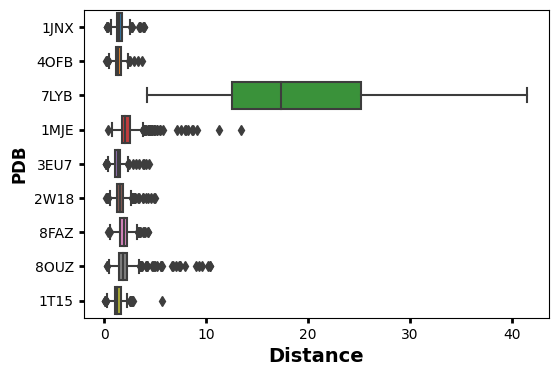

In [8]:
residue_dist_df = pd.concat([BRCA1_1JNX_dist_df, BRCA1_4OFB_dist_df,BRCA1_7LYB_dist_df,
                             BRCA2_1MJE_dist_df,PALB2_3EU7_dist_df,PALB2_2W18_dist_df,
                             RAD51C_8FAZ_dist_df, RAD51C_8OUZ_dist_df, BRCA1_1T15_dist_df], axis=0)
residue_dist_df = residue_dist_df.reset_index(drop=True)
residue_dist_no7lyb_df = residue_dist_df[residue_dist_df['PDB'] != '7LYB']
plt.figure(figsize=(6, 4))
sns.boxplot(x='Mean_Distance', y='PDB', data=residue_dist_df)
plt.xlabel('Distance', fontsize=14, fontweight='bold')  
plt.ylabel('PDB', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', width=2)  
plt.tick_params(axis='y', width=2)
plt.savefig('protien_predicted_distance.png', dpi=300)
plt.show()